<a href="https://colab.research.google.com/github/EmilyCY/CIFAR10-Image-Classification/blob/Kman/Simple_2_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import calendar
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split




Use these next three commands only the first time running this code and loading CIFAR10

In [2]:
#mount google drive(if file :"cifar10python.tar.gz" is stored in a Google Drive)
from google.colab import drive

In [3]:
path=r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Final project/cifar-10-batches-py/'
print(path)

/content/drive/MyDrive/Colab Notebooks/Machine Learning/Final project/cifar-10-batches-py/


In [4]:
#this decompresses the tar.gz file and loads it into batches of 10,000
!tar -xvf "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Final project/cifar10python.tar.gz" -C "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Final project" 

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [5]:
#standard pickle load process
def unpickle(cifar10):
    import pickle
    with open(cifar10, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict
    
batch1=unpickle("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Final project/cifar-10-batches-py/data_batch_1")
batch2=unpickle("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Final project/cifar-10-batches-py/data_batch_2")
batch3=unpickle("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Final project/cifar-10-batches-py/data_batch_3")
batch4=unpickle("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Final project/cifar-10-batches-py/data_batch_4")
batch5=unpickle("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Final project/cifar-10-batches-py/data_batch_5")
test_batch=unpickle("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Final project/cifar-10-batches-py/test_batch")

In [6]:
# checking dataset size 
print("This is the size of the data for the 32 x 32 pixels by R G and B: ", batch2['data'][1].size)
print("This is the number of cells: ", len(batch2['labels']))

This is the size of the data for the 32 x 32 pixels by R G and B:  3072
This is the number of cells:  10000


In [7]:
#Set a number (at random) to use to look at images etc
example = 199

In [8]:
from skimage.transform import resize

images=[]
flat_images=[]
labels=[]

# this function reshapes the image data into (32,32,3) array 
def reshape_image(image):
  img_r=image[0:1024].reshape(32,32)
  img_g=image[1024:2048].reshape(32,32)
  img_b=image[2048:].reshape(32,32)
  img = np.dstack((img_r, img_g, img_b))
  return img



# Using second batch

This is a picture of a  sea_boat_s_001760.png


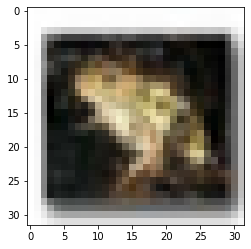

In [18]:
# reshape training dataset
for i in range(0,10000):
    image=batch2['data'][i, :]
    reshaped_img = reshape_image(image)
    images.append(reshaped_img)
    flat_images.append(reshaped_img.flatten())

plt.imshow(images[example],interpolation='nearest')
print('This is a picture of a ',test_batch['filenames'][example])

This is a picture of a  sea_boat_s_001760.png


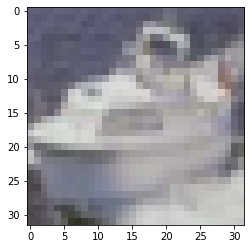

In [19]:
# reshape test dataset 
test_images=[]
flat_test_images=[]
for i in range(0,10000):
    image=test_batch['data'][i, :]
    img = reshape_image(image)
    test_images.append(img)
    flat_test_images.append(img.flatten())

plt.imshow(test_images[example],interpolation='nearest')
print('This is a picture of a ',test_batch['filenames'][example])

# Time function

This tracks the time taken to implement

In [20]:
def currentTime():
    '''
    Returns the current time in seconds since EPOC
    Used to measure how much time each phase took

    Returns:
    --------
    the current time in second since EPOC
    '''

    return calendar.timegm(time.gmtime())

In [21]:
# prepare training set and testing set 
print("Time taken to load set = ")
tik = currentTime()
x_train=flat_images[0:10000] # select sample size
print("Took: " + str(currentTime() - tik) + " sec")
print("x_train: ")
print(x_train)
print("\n")

print("Time taken to load  set = ")
tik = currentTime()
labels=np.array(batch2['labels'])
y_train=labels[0:10000]
print("Took: " + str(currentTime() - tik) + " sec")
print("y_train: ")
print(y_train)
print("\n")

test_labels=np.array(test_batch['labels'])

print("Time taken to load set = ")
tik = currentTime()
x_test=flat_test_images[0:10000]
print("Took: " + str(currentTime() - tik) + " sec")
print("x_test: ")
print(x_test)
print("\n")

labels=np.array(test_batch['labels'])
print("Time taken to load set = ")
tik = currentTime()
y_test=test_labels[0:10000]
print("Took: " + str(currentTime() - tik) + " sec")
print("y_test: ")
print(y_test)


Time taken to load set = 
Took: 0 sec
x_train: 
[array([ 35,  25,  26, ..., 166, 166, 168], dtype=uint8), array([20, 15, 12, ..., 88, 89, 51], dtype=uint8), array([116, 103,  56, ..., 155, 144, 124], dtype=uint8), array([ 98,  90,  81, ...,  82, 109, 138], dtype=uint8), array([ 85, 103, 138, ...,   8,  19,  66], dtype=uint8), array([111, 105,  84, ...,  69,  63,  51], dtype=uint8), array([131, 122, 113, ..., 219, 178, 149], dtype=uint8), array([145, 152, 139, ..., 173, 174, 162], dtype=uint8), array([219, 238, 245, ..., 225, 239, 245], dtype=uint8), array([132, 127, 123, ..., 124, 123, 126], dtype=uint8), array([115, 138, 191, ...,  62,  61,  70], dtype=uint8), array([140, 143, 147, ..., 246, 248, 250], dtype=uint8), array([ 53,  57,  51, ..., 104,  96,  92], dtype=uint8), array([238, 217, 196, ..., 113,  61,  28], dtype=uint8), array([119,  56,  61, ..., 107,  60,  55], dtype=uint8), array([ 35,  38,   6, ..., 132, 223,  83], dtype=uint8), array([209, 221, 222, ...,  43,  72,  76], dt

In [22]:
print( 'x_train data description')
pd.DataFrame(x_train).describe()

x_train data description


,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.27020,-0.95060,4.728000,1.789200,-1.290500,4.293600,0.334900,-2.47940,3.465400,-0.241600,...,15.697900,3.593300,4.719900,16.242600,2.697000,4.94170,16.148900,2.79230,5.375200,15.541100
std,76.47988,76.41124,68.367103,77.028956,77.052578,68.975713,77.301814,77.32492,69.496988,77.608768,...,79.403609,83.212279,85.569412,79.197483,83.052755,85.27766,78.937208,82.69504,84.765493,78.593244
min,-128.00000,-128.00000,-128.000000,-128.000000,-128.000000,-128.000000,-128.000000,-128.00000,-128.000000,-128.000000,...,-128.000000,-128.000000,-128.000000,-128.000000,-128.000000,-128.00000,-128.000000,-128.00000,-128.000000,-128.000000
25%,-69.00000,-71.00000,-48.000000,-69.000000,-72.000000,-50.000000,-71.000000,-73.00000,-51.000000,-72.000000,...,-59.000000,-79.000000,-83.000000,-59.000000,-80.000000,-82.00000,-58.000000,-80.00000,-81.000000,-58.000000
50%,-1.00000,-1.00000,0.000000,0.000000,-3.000000,0.000000,-1.000000,-3.00000,-1.000000,-1.000000,...,37.000000,7.000000,14.000000,38.000000,5.500000,15.00000,37.000000,5.00000,14.000000,36.000000
75%,69.00000,68.00000,61.000000,71.000000,69.000000,61.000000,71.000000,68.00000,61.000000,70.000000,...,84.000000,83.000000,86.000000,84.000000,82.000000,86.00000,83.000000,81.00000,85.000000,82.250000
max,127.00000,127.00000,127.000000,127.000000,127.000000,127.000000,127.000000,127.00000,127.000000,127.000000,...,127.000000,127.000000,127.000000,127.000000,127.000000,127.00000,127.000000,127.00000,127.000000,127.000000


Time taken to perform PCA reduction to 85% = 
Took: 41 sec
[0.29106062 0.1126135  0.06666641 0.03735187 0.03579219 0.0279264
 0.02708057 0.02159339 0.02055904 0.014473   0.01331266 0.01102865
 0.01048769 0.00973923 0.00907655 0.00826355 0.00753985 0.00736667
 0.00678287 0.00649514 0.00595034 0.00580372 0.00508254 0.0049825
 0.0047368  0.00463933 0.00441484 0.00434356 0.00405555 0.00388352
 0.00369077 0.00338751 0.00331848 0.00315412 0.0030848  0.00287331
 0.00266182 0.00261292 0.00259773 0.00249644 0.00243592 0.00234331
 0.00228706 0.00223236 0.00209154 0.00205715 0.00193614 0.00191389
 0.00189717 0.00183146 0.00181899 0.00179623 0.00170912 0.00168685]


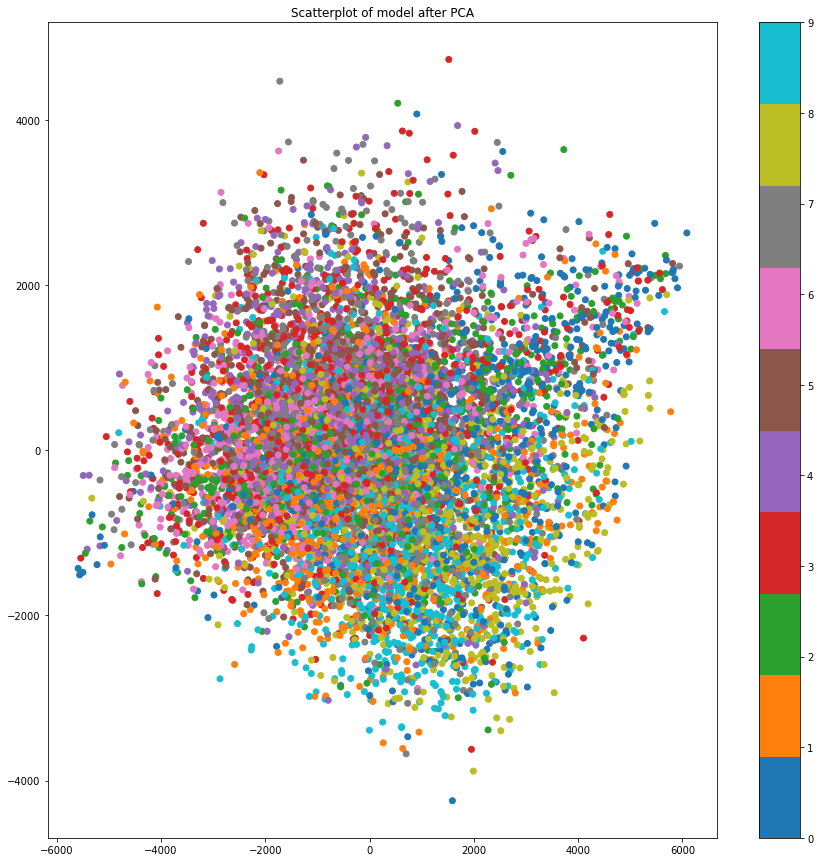

In [32]:
pca = decomposition.PCA(n_components=0.85)
print("Time taken to perform PCA reduction to 85% = ")
tik = currentTime()

pca.fit(x_train)
print("Took: " + str(currentTime() - tik) + " sec")

X = pca.transform(x_train)
print(pca.explained_variance_ratio_)


plt.figure( figsize=(15,15) )
plt.scatter( X[:, 0], X[:, 1], c=y_train, cmap='tab10' )
plt.title('Scatterplot of model after PCA')
plt.colorbar()
plt.show()

# Enable CoLab to use GPU on SVM

Load CUDA Toolkit 9.0  to run Thundersvm

In [9]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb

--2022-06-04 05:26:56--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.39.144
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb [following]
--2022-06-04 05:26:57--  https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64.deb?4msbRYW58NwwdlNh4nn0bOYdeCVJCtktTajCTCQDfNWDky8kZgrXvvVd2Bj9-NsMoAvJ4qx_GGDFOip8Oj5SV4uTrOH_d

In [10]:
!ls  # Check if required cuda 9.0 amd64-deb file is downloaded

cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb  drive  sample_data


In [11]:
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb

Selecting previously unselected package cuda-repo-ubuntu1704-9-0-local.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb ...
Unpacking cuda-repo-ubuntu1704-9-0-local (9.0.176-1) ...
Setting up cuda-repo-ubuntu1704-9-0-local (9.0.176-1) ...


In [12]:
!ls /var/cuda-repo-9-0-local | grep .pub

7fa2af80.pub


In [13]:
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub

OK


In [14]:
!apt-get update

Get:1 file:/var/cuda-repo-9-0-local  InRelease
Ign:1 file:/var/cuda-repo-9-0-local  InRelease
Get:2 file:/var/cuda-repo-9-0-local  Release [574 B]
Get:2 file:/var/cuda-repo-9-0-local  Release [574 B]
Get:3 file:/var/cuda-repo-9-0-local  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-9-0-local  Release.gpg [819 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:6 file:/var/cuda-repo-9-0-local  Packages [15.8 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:13 http://archive.ubun

In [15]:
!sudo apt-get install cuda-9.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'cuda-9-0' for regex 'cuda-9.0'
Note, selecting 'libcuda-9.0-1' for regex 'cuda-9.0'
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  cuda-command-line-tools-9-0 cuda-core-9-0 cuda-cublas-9-0
  cuda-cublas-dev-9-0 cuda-cudart-9-0 cuda-cudart-dev-9-0 cuda-cufft-9-0
  cuda-cufft-dev-9-0 cuda-curand-9-0 cuda-curand-dev-9-0 cuda-cusolver-9-0
  cuda-cusolver-dev-9-0 cuda-cusparse-9-0 cuda-cusparse-dev-9-0
  cuda-demo-suite-9-0 cuda-documentation-9-0 cuda-driver-dev-9-0
  cuda-libraries-9-0 cuda-libraries-dev-9-0 cuda-license-9-0
  cuda-misc-headers-9-0 cuda-npp-9-0 cuda-npp-dev-9-0 cuda-nvgraph-9-0
  cuda-nvgraph-dev-9-0 cuda-nvml-dev-9-0 cuda-nvrtc-9-0 cuda-nvrtc-dev-9-0
  cuda-runtime-9-0 cuda-samples-9-0 cuda-toolkit-9-0 cuda-visual-t

In [16]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


In [17]:
!pip install thundersvm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 507 kB 4.3 MB/s 


# Train model

kernel_type = CSH.CategoricalHyperparameter(
        name='kernel_type', choices=['linear', 'poly', 'rbf', 'sigmoid'])

degree = CSH.UniformIntegerHyperparameter(
        'degree', lower=2, upper=4, default_value=2)

coef0 = CSH.UniformFloatHyperparameter(
        name='coef0', lower=0, upper=1, default_value=0.0)

gamma = CSH.UniformFloatHyperparameter(
        name='gamma', lower=1e-5, upper=1e2, default_value=1, log=True)
        

In [24]:
from thundersvm import SVC

In [25]:
#need to know what parameters can be tuned for our model
SVC().get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'gpu_id', 'kernel', 'max_iter', 'max_mem_size', 'n_jobs', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

Best parameters: 

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}

Accuracy Score: 
0.21

(from Emily's findings)

In [26]:
# Set SVM parameters (from Emily's findings)

C = 100
gamma = 0.001
#kernel = 'poly' 
kernel = 2 #polynomial

model = SVC(C=C, gamma=gamma) #won't accept kernel type? using (default 2)'rbf'

#model = SVC(kernel='poly') #won't accept 'poly" as kernel type?
#model = SVC(C=C, gamma=gamma, kernel=kernel) #won't accept 'poly" as kernel type?

In [27]:
#train model

print("Time taken to train model = ")
tik = currentTime()

model.fit(x_train,y_train)

print("Took: " + str(currentTime() - tik) + " sec")

pred = model.predict(x_test)
acc = accuracy_score(y_test,pred)
print("Accuracy score: ", ('Acc: {:.4f}'.format(acc)))
#print(metrics.accuracy_score(y_test,pred))

Time taken to train model = 
Took: 26 sec
Accuracy score:  Acc: 0.1000


Can't work out how to export the parameters used to be able to create a record???


```
# This is formatted as code
```


SVM doesn't have a .history or get_config function as other models do for this purpose

In [34]:
#create an array manually to store the results in
param_C = 0.1, 10, 100, 100
param_gamma=0.0001,0.0001, 0.0001, 0.001
kernel = 'rbf','rbf','rbf','rbf',
time_took=15, 16, 20,  26
result = 0.1, 0.1, 0.1, 0.1000

findings=(param_C, param_gamma, kernel, time_took, result)

In [48]:
df = pd.DataFrame(findings)
df=df.T
df.columns=('C', 'gamma', 'kernel', 'Time', 'Result')
print(df)

     C   gamma kernel Time Result
0  0.1  0.0001    rbf   15    0.1
1   10  0.0001    rbf   16    0.1
2  100  0.0001    rbf   20    0.1
3  100   0.001    rbf   26    0.1


# Feature engineering

## Grey scale

This is a picture of a  sea_boat_s_001760.png


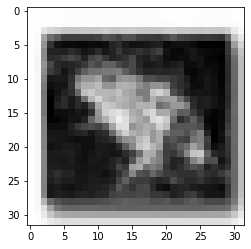

In [49]:
# basic feature extraction 
from sklearn.preprocessing import MinMaxScaler

# gray scale 
gray_images=[]
flat_gray_images=[]
gray_test_images=[]
rgb_weights = [0.2989, 0.5870, 0.1140]

# training set 
for image in images:
  grayscale= np.dot(image[...,:3],[0.2989, 0.5870, 0.1140])
  gray_images.append(grayscale)
  flat_gray_images.append(grayscale.flatten())

plt.imshow(gray_images[example], cmap=plt.get_cmap('gray'))
print('This is a picture of a ',test_batch['filenames'][example])

# testing set 
for image in test_images:
  grayscale_test= np.dot(image[...,:3],[0.2989, 0.5870, 0.1140])
  gray_test_images.append(grayscale.flatten())

# normalising the feature vectors 
scaler = MinMaxScaler(feature_range=(0, 1))
# normalising training set 
rescaled_gray_images = scaler.fit_transform(flat_gray_images)
xg_train=rescaled_gray_images
# normalising testing set 
rescaled_testing_images = scaler.fit_transform(gray_test_images)
xg_test=rescaled_testing_images

In [50]:
#train model on greyscale

print("Time taken to train greyscale model = ")
tik = currentTime()

model.fit(xg_train,y_train)

print("Took: " + str(currentTime() - tik) + " sec")

pred = model.predict(xg_test)
acc = accuracy_score(y_test,pred)
print("Accuracy score: ", ('Acc: {:.4f}'.format(acc)))
#print(metrics.accuracy_score(y_test,pred))

Time taken to train greyscale model = 
Took: 13 sec
Accuracy score:  Acc: 0.1000


## Edge detection (replace this with HOG as HOG gives both the edge direction and magnitude)

## HOG Parameters

In [65]:
import cv2
######################################################################################
#General parameters
imageSize = 32  #The size of the original image - in pixels - assuming this is a square image
trainingDataSize = 10000    #The number of images in the training set
testDataSize = 10000        #The number of images in the test set
imageSize = 32  #The size of the original image - in pixels - assuming this is a square image
channels = 3    #The number of channels of the image. A RBG color image, has 3 channels
classes = 10    #The number of classes available for this dataset
trainingDataFiles = ('./cifar-10-batches-py/data_batch_1', './cifar-10-batches-py/data_batch_2', './cifar-10-batches-py/data_batch_3', './cifar-10-batches-py/data_batch_4','./cifar-10-batches-py/data_batch_5') #An array of filenames containing the training data set
testDataFile = './dataset/test_batch' #The filename containing the test set
pcaFileName = 'pca' #The PCS filename
svmFileName = 'svm' #The SVM filename
## HOG Parameters:
## ================
winSize = 32
blockSize = 12
blockStride = 4
cellSize = 4
nbins = 18
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = True
nlevels = 64
signedGradient = True
hog = cv2.HOGDescriptor((winSize,winSize),(blockSize, blockSize),(blockStride,blockStride),(cellSize,cellSize),nbins,derivAperture, winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels,signedGradient)
######################################################################################

In [71]:
######################################################################################
##PCA parameters:
##==================
pcaDim = 3000
######################################################################################

In [67]:
##################DONT NEED THIS, CAN BE REMOVED - WE ALREADY CREATED 'images and test_images' ####################################################################
def loadTrainingData(filenames):
    '''
    Load all the training data from all files

    Parameters:
    -----------
    filenames: array of string
        An array The name of the file containing the data to load

    Returns:
    --------
    trainingImages: array of the training set images
    trainingLabels: array of the training set labels
    '''

    #Pre-allocate the arrays
    trainingImages = np.zeros(shape=[trainingDataSize, imageSize, imageSize, channels])
    trainingLabels = np.zeros(shape=[trainingDataSize], dtype=int)
    #trainingImages = np.zeros(shape=[trainingDataSize, imageSize, imageSize, channels], dtype=numpy.uint8)
    #trainingLabels = np.zeros(shape=[trainingDataSize], dtype=int)

    start=0
    for fileName in filenames:
        origImages, labels = loadData(fileName)
        images = convertImages(origImages)

        numOfImages = len(images);
        end = start + numOfImages;
        trainingImages[start:end, :] = images
        trainingLabels[start:end] = labels
        start = end

    return trainingImages, trainingLabels
#####################################################################################

In [29]:
def threshold(image, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = image.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = image.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((image <= highThreshold) & (image >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

## HOG descriptors

In [54]:
#####################################################################################
def calcHOG(images):
    '''
    Calculate the HOG descriptors of the given images

    Parameters:
    -----------
    images: an array of images
        The images to which a HOG calculation should be applied

    Returns:
    --------
    hogDescriptors: an array of HOG vectors, 5832 components each
    '''

    hogDescriptors = []
    for image in images:
        hogDescriptors.append( hog.compute(image) )

    hogDescriptors = np.squeeze(hogDescriptors)
    return hogDescriptors
#####################################################################################

This is a picture of a  sea_boat_s_001760.png


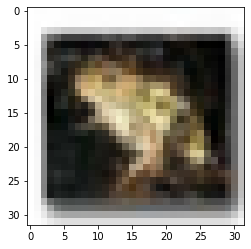

In [63]:
# reshape training dataset
###INFO ONLY REMove###
for i in range(0,10000):
    image=batch2['data'][i, :]
    reshaped_img = reshape_image(image)
    images.append(reshaped_img)
    flat_images.append(reshaped_img.flatten())

plt.imshow(images[example],interpolation='nearest')
print('This is a picture of a ',test_batch['filenames'][example])

# Training Phase

First load the data into two arrays:

In [68]:
print("Loading the training set..."),
tik = currentTime()
trainingImages, trainingLabels = loadTrainingData(batch2)
print("Took: " + str(currentTime()-tik) + " sec" )

Loading the training set...


NameError: ignored

Create a HOG descriptor from these images

In [69]:
#create a HOG descriptor
print("Creating HOG descriptors from the training set..."),
tik = currentTime()
trainHogDescriptors = calcHOG(images)
print("Took: " + str(currentTime() - tik) + " sec")

Creating HOG descriptors from the training set...
Took: 3 sec


Reduce the dimension of the HOG descriptors to 3000  #####NB the original uses 50k, we are only using 10k (batch)

In [72]:
print("Reducing the dimension of the HOG descriptors to " + str(pcaDim) + "..."),
tik = currentTime()
pca = PCA(pcaDim)
trainHogProjected = pca.fit_transform(trainHogDescriptors)
print("Took: " + str(currentTime() - tik) + " sec")

Reducing the dimension of the HOG descriptors to 3000...
Took: 196 sec


Save it as a pca file

In [73]:
    print("Save it as a PCA file..."),
    tik = currentTime()
    pcaFile = open(pcaFileName, 'wb')
    pickle.dump(pca, pcaFile)
    pcaFile.close()
    print("Took: " + str(currentTime() - tik) + " sec")

Save it as a PCA file...
Took: 1 sec


Train the SVM model using the reduced HOG descriptor

In [76]:
######################################################################################
##SVM parameters:
##===============
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(0.1)
svm.setGamma(0.1)
######################################################################################

In [78]:
print("Training the SVM model using the reduced HOG descriptor..."),
tik = currentTime()
svm.train(np.asarray(trainHogProjected), cv2.ml.ROW_SAMPLE, np.asarray(y_train))
svm.save(svmFileName)
print("Took: " + str(currentTime() - tik) + " sec")

Training the SVM model using the reduced HOG descriptor...


error: ignored

# Testing phase


Classify the test set

In [ ]:
print("Loading the test set..."),
tik = currentTime()
testImages, testLabels = loadTestData(testDataFile)
print("Took: " + str(currentTime() - tik) + " sec")

Calculate confusion matrix

In [ ]:
print ("Confusion matrix:")
print ("=================")
confusionMatrix = confusion_matrix(testLabels, testResponse)
print(confusionMatrix)

Calculate accuracy

In [ ]:
print ("======================================")
accuracy = (np.asarray(testLabels) == testResponse).mean()
print("Percentage Accuracy: %.2f %%" % (accuracy*100))
print ("======================================")